In [1]:
# define rooms and items
from IPython.display import Image
from webptools import webplib as webp

#Images
bed=Image(filename='../Image_key_bed.jpg',width=200,height=200)
joker=Image(filename='../joker.jpg',width=200,height=200)

#definicion de variables/diccionarios(rooms,doors,keys...)

#game room

couch = {"name": "couch","type": "furniture","image": "i",}
door_a = {"name": "door a","type": "door",}
key_a = {"name": "key for door a","type": "key","target": door_a,}
piano = {"name": "piano","type": "furniture","image": "i",}
cuadro = {"name": "cuadro","type": "furniture",'image': bed}
piano_padlock = {"name": "piano padlock","type": "door",}
key_piano = {"name": "key for piano padlock","type": "key","target": piano_padlock,}
game_room = {"name": "game room","type": "room",}
ball = {"name": "ball","type": "furniture","image": "i",}
tree = {"name": "tree","type": "furniture","image": "i",}

#Bedroom1

bedroom_1 = {"name": "bedroom 1","type": "room",}
queen_bed = {"name": "queen bed","type": "furniture","image": "i",}
cuadro_r = {"name": "cuadro r","type": "furniture",'image': joker}
door_b = {"name": "door b","type": "door",}
door_c = {"name": "door c","type": "door",}
key_b = {"name": "key for door b","type": "key","target": door_b,}

#Bedroom2

bedroom_2 = {"name": "bedroom 2","type": "room",}
double_bed = {"name": "double bed","type": "furniture","image": "i",}
dresser = {"name": "dresser","type": "furniture","image": "i",}
key_c = {"name": "key for door c","type": "key","target": door_c,}
door_d = {"name": "door d","type": "door",}
key_d = {"name": "key for door d","type": "key","target": door_d,}

#LivingRoom

living_room = {"name": "living room","type": "room",}
dining_table = {"name": "dining table","type": "furniture","image": "i",}


#Outside
outside = {"name": "outside",}

#garden
garden = {"name": "garden","type": "room",}
garden_door1 = {"name": "garden door1","type": "door",}
garden_door2 = {"name": "garden door2","type": "door",}
key_garden1 = {"name": "key for garden door1","type": "key","target": garden_door1,"image": "i",}
key_garden2 = {"name": "key for garden door2","type": "key","target": garden_door2,"image": "i",}

all_rooms = [game_room,bedroom_1,bedroom_2,living_room,garden, outside]
all_doors = [door_a,door_b,door_c,door_d,piano_padlock,garden_door1,garden_door2]

# define which items/rooms are related

object_relations = {
    "game room": [couch, door_a,piano_padlock,cuadro,garden_door1,ball],
    "couch":[key_piano],
    "piano": [key_a],
    "door a": [game_room, bedroom_1],
    "ball": [key_garden1],
    
    "bedroom 1": [queen_bed,door_a,door_b, door_c,cuadro_r],
    "queen bed": [key_b],
    "door b": [bedroom_1, bedroom_2],
    "door c": [bedroom_1, living_room],
    
    "bedroom 2": [dresser,double_bed,door_b],
    "double bed": [key_c],
    "dresser": [key_garden2,key_d], #tiene dos llaves, necesario examinarlo dos veces

    "living room": [dining_table,door_d,garden_door2],
    "door d": [living_room, outside],
    'garden': [tree,garden_door1,garden_door2],
    'garden door2': [living_room,garden],
    'garden door1': [game_room,garden],
    
    "outside": [door_d]
}

# define game state. Do not directly change this dict. 
# Instead, when a new game starts, make a copy of this
# dict and use the copy to store gameplay state. This 
# way you can replay the game multiple times.

INIT_GAME_STATE = {
    "current_room": game_room,
    "keys_collected": [],
    "target_room": outside
}

In [2]:
def linebreak():
    """
    Print a line break
    """
    print("\n\n")

def start_game():
    """
    Start the game
    """
    print("You wake up on a couch and find yourself in a strange house with no windows which you have never been to before. You don't remember why you are here and what had happened before. You feel some unknown danger is approaching and you must get out of the house, NOW!")
    play_room(game_state["current_room"])

def play_room(room):
    
    congrats=Image(filename='../congrats.gif',width=200,height=200)
    
    """
    Play a room. First check if the room being played is the target room.
    If it is, the game will end with success. Otherwise, let player either 
    explore (list all items in this room) or examine an item found here.
    """
    game_state["current_room"] = room
    if(game_state["current_room"] == game_state["target_room"]):
        print("Congrats! You escaped the room!")
        display(congrats)
    else:
        print('\033[0m'+"You are now in " + room["name"])
        intended_action = input("What would you like to do? Type"+'\033[1m'+" 'explore' or 'examine'?").strip()
        if intended_action == "explore":
            explore_room(room)
            play_room(room)
        elif intended_action == "examine":
            examine_item(input("What would you like to "+'\033[1m'+"examine?").strip())
        else:
            print("Not sure what you mean. Type"+'\033[1m'+" 'explore' or 'examine'.")
            play_room(room)
        linebreak()

def explore_room(room):
    """
    Explore a room. List all items belonging to this room.
    """
    items = [i["name"] for i in object_relations[room["name"]]]
    print("You explore the room. This is "+room["name"]+". You find: " +'\033[1m'+", ".join(items))

def get_next_room_of_door(door, current_room):
    """
    From object_relations, find the two rooms connected to the given door.
    Return the room that is not the current_room.
    """
    connected_rooms = object_relations[door["name"]]
    for room in connected_rooms:
        if(not current_room == room):
            return room

def examine_item(item_name):
    """
    Examine an item which can be a door or furniture.
    First make sure the intended item belongs to the current room.
    Then check if the item is a door. Tell player if key hasn't been 
    collected yet. Otherwise ask player if they want to go to the next
    room. If the item is not a door, then check if it contains keys.
    Collect the key if found and update the game state. At the end,
    play either the current or the next room depending on the game state
    to keep playing.
    """
    current_room = game_state["current_room"]
    next_room = ""
    output = None
    
    for item in object_relations[current_room["name"]]:
        if(item["name"] == item_name):
            output = "You examine " + item_name + ". "
            if(item["type"] == "door"):
                have_key = False
                for key in game_state["keys_collected"]:
                    if(key["target"] == item):
                        have_key = True
                if(have_key and item["name"]=='piano padlock'):
                    output += "You unlock it with a key you have."
                    object_relations["game room"]=[couch,door_a,piano]
                elif(have_key):
                    output += "You unlock it with a key you have."
                    next_room = get_next_room_of_door(item, current_room)
                else:
                    output += "It is locked but you don't have the key."
            else:
                if(item["name"] in object_relations and len(object_relations[item["name"]])>0):
                    item_found = object_relations[item["name"]].pop()
                    game_state["keys_collected"].append(item_found)
                    output += "You find "+'\033[1m' + item_found["name"] + "."
                elif item["image"]!="i":
                    display(item["image"])
                else:
                    output += "There isn't anything interesting about it."
            print(output)
            break

    if(output is None):
        print("The item you requested is not found in the current room.")
    
    if(next_room and input("Do you want to go to the next room? Ener 'yes' or 'no'").strip() == 'yes'):
        play_room(next_room)
    else:
        play_room(current_room)

You wake up on a couch and find yourself in a strange house with no windows which you have never been to before. You don't remember why you are here and what had happened before. You feel some unknown danger is approaching and you must get out of the house, NOW!
You are now in game room
What would you like to do? Type 'explore' or 'examine'?explore
You explore the room. This is game room. You find: couch, door a, piano padlock, cuadro, garden door1, ball
You are now in game room
What would you like to do? Type 'explore' or 'examine'?examine
What would you like to examine?couch
You examine couch. You find key for piano padlock.
You are now in game room
What would you like to do? Type 'explore' or 'examine'?examine
What would you like to examine?cuadro


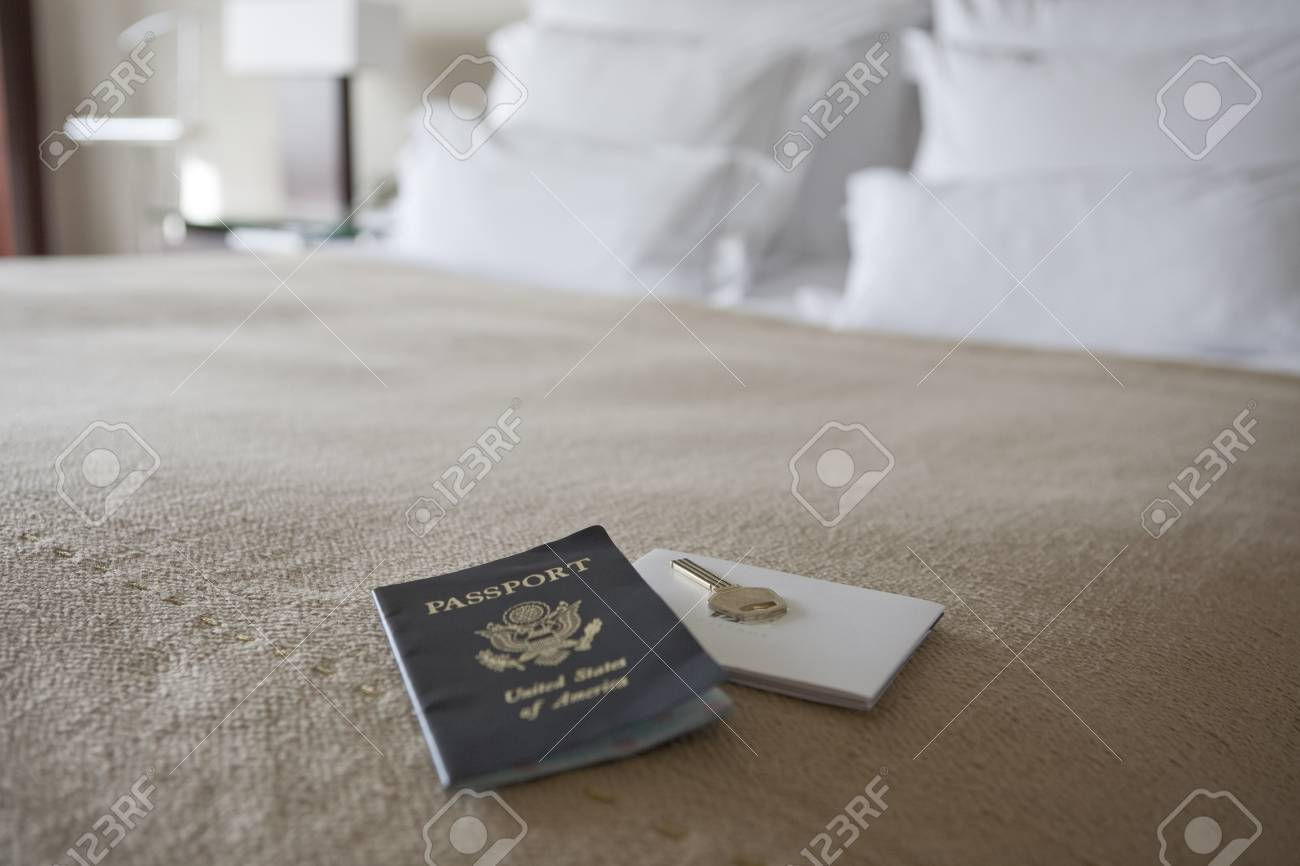

You examine cuadro. 
You are now in game room
What would you like to do? Type 'explore' or 'examine'?examine
What would you like to examine?piano padlock
You examine piano padlock. You unlock it with a key you have.
You are now in game room
What would you like to do? Type 'explore' or 'examine'?examine
What would you like to examine?piano
You examine piano. You find key for door a.
You are now in game room
What would you like to do? Type 'explore' or 'examine'?examine
What would you like to examine?door a
You examine door a. You unlock it with a key you have.
Do you want to go to the next room? Ener 'yes' or 'no'yes
You are now in bedroom 1
What would you like to do? Type 'explore' or 'examine'?explore
You explore the room. This is bedroom 1. You find: queen bed, door a, door b, door c, cuadro r
You are now in bedroom 1
What would you like to do? Type 'explore' or 'examine'?examine
What would you like to examine?cuadro r


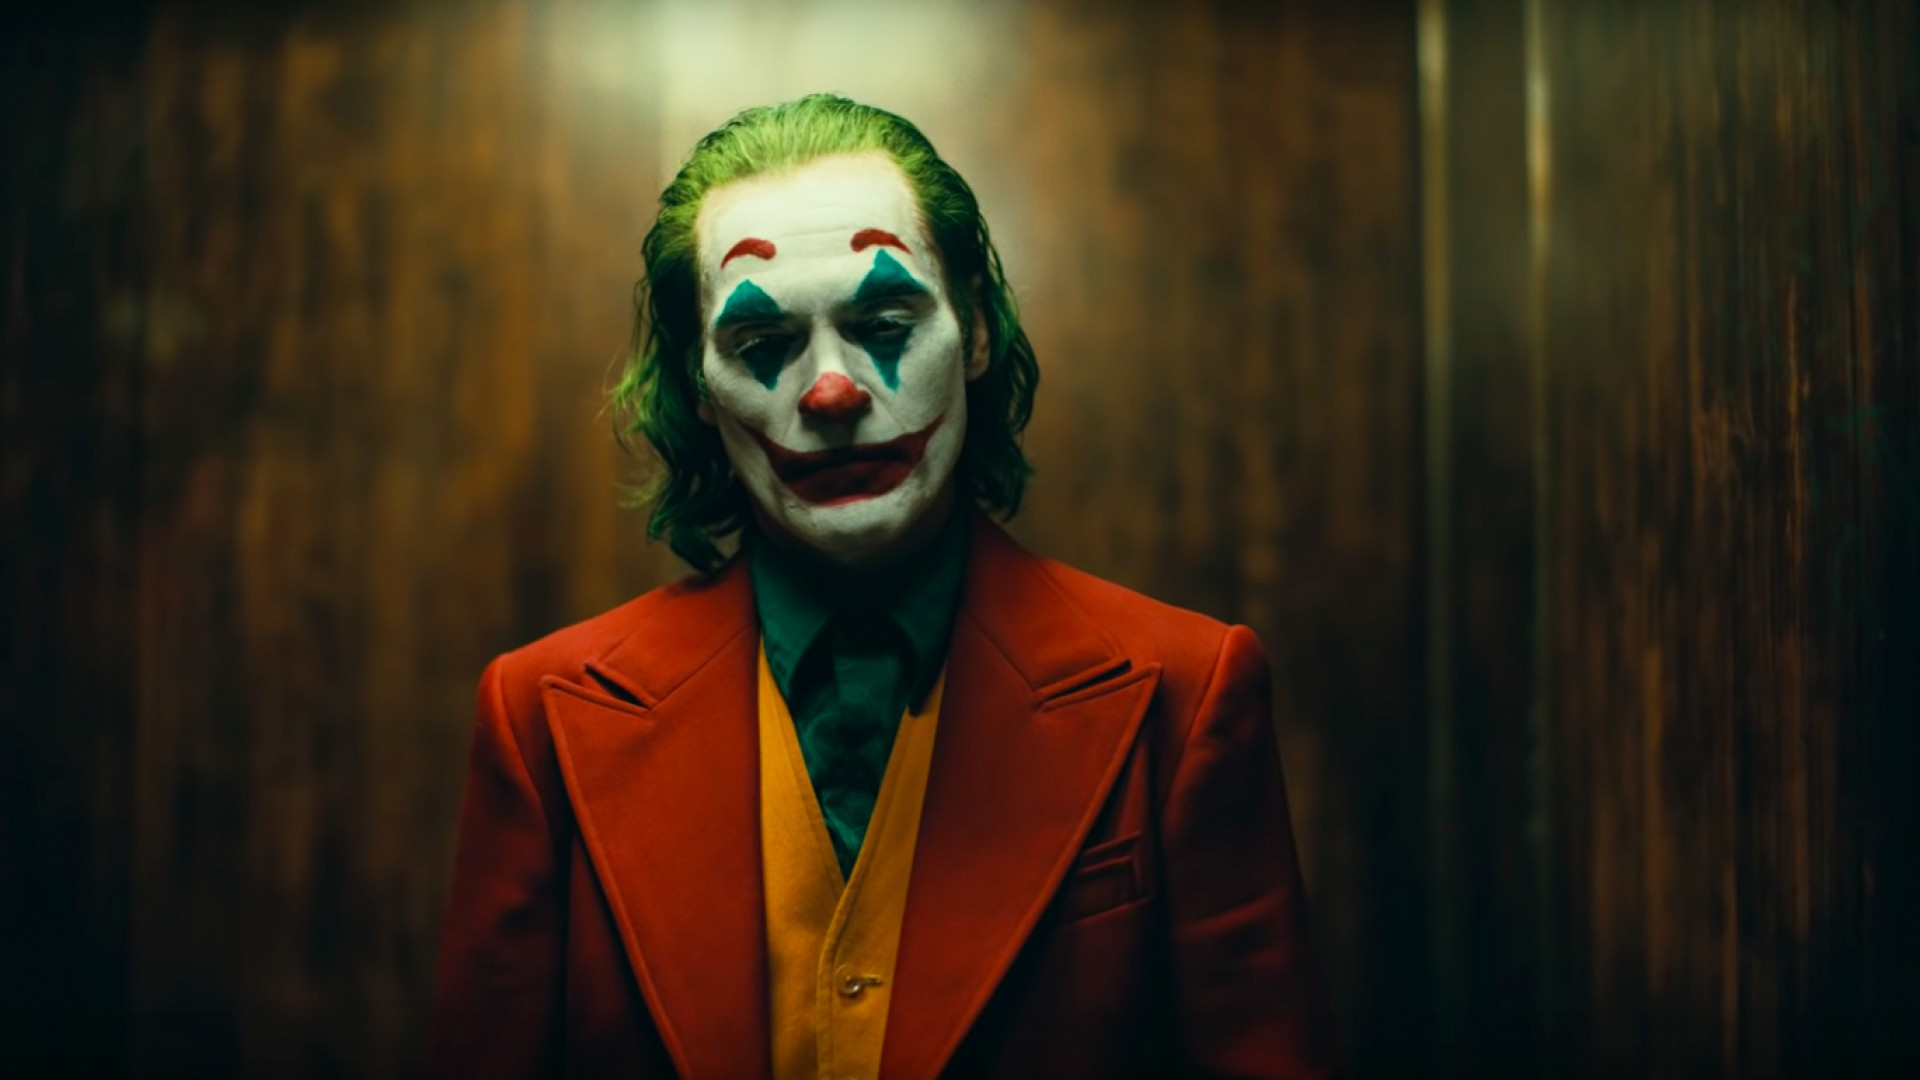

You examine cuadro r. 
You are now in bedroom 1
What would you like to do? Type 'explore' or 'examine'?examine
What would you like to examine?queen bed
You examine queen bed. You find key for door b.
You are now in bedroom 1
What would you like to do? Type 'explore' or 'examine'?examine
What would you like to examine?door b
You examine door b. You unlock it with a key you have.
Do you want to go to the next room? Ener 'yes' or 'no'yes
You are now in bedroom 2
What would you like to do? Type 'explore' or 'examine'?examine
What would you like to examine?double bed
You examine double bed. You find key for door c.
You are now in bedroom 2
What would you like to do? Type 'explore' or 'examine'?explore
You explore the room. This is bedroom 2. You find: dresser, double bed, door b
You are now in bedroom 2
What would you like to do? Type 'explore' or 'examine'?examine
What would you like to examine?dresser
You examine dresser. You find key for door d.
You are now in bedroom 2
What would you li

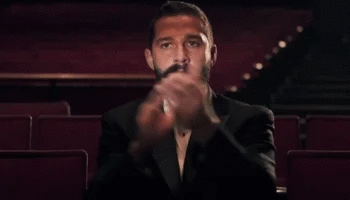

In [3]:
game_state = INIT_GAME_STATE.copy()

start_game()